## preproc

In [1]:
import pandas as pd
import numpy as np

# csvファイルの読み込み
df = pd.read_csv('./train.csv', header=0) # 0行目がヘッダー(defaultの動作、指定しない場合はNoneを指定)

In [2]:
# フィルターされたデータの内特定の列だけ見たい場合
#df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]
#df[df['Age'].isnull().any(1)]
#df[df['Age'].isnull()]

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#
#df["Age"].dropna().hist(bins=16, range=(0, 80), alpha=0.5)

In [4]:
# データ前処理
df.Embarked = df.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
#df.Cabin = df.Cabin.replace('NaN', 0)
df.Sex = df.Sex.replace(['male', 'female'], [0, 1])
df.Age = df.Age.fillna(df.Age.median()) # とりあえず中央値で埋める df[df['Age'].isnull()] NaNを名前の敬称を元に割り当てた方がよさそう
df = df.dropna(subset=['Embarked']) # 乗船港が不明なのはどうしようもないので削る
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,0.0


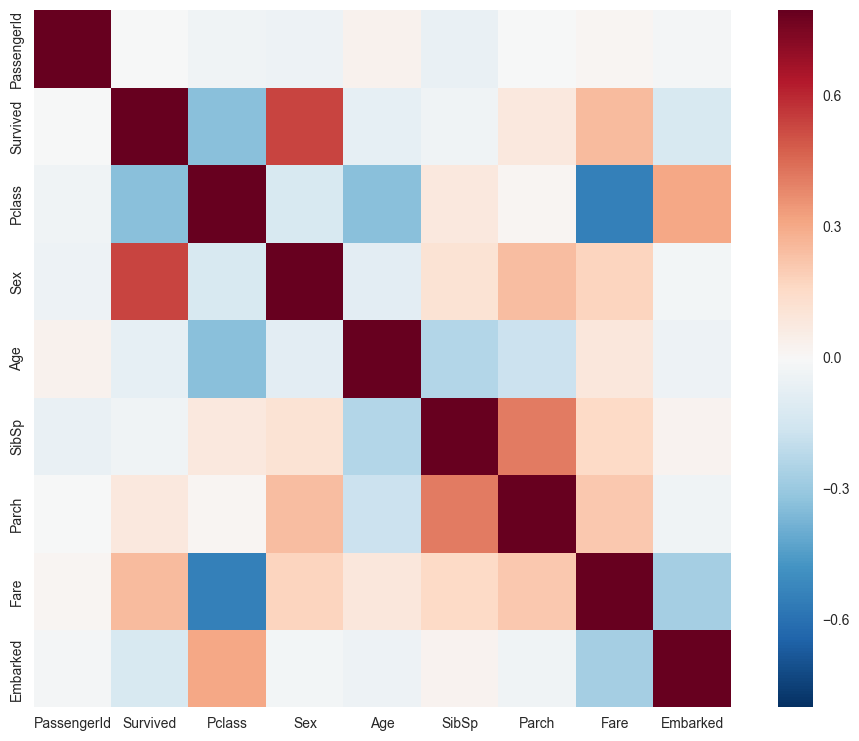

In [5]:
import seaborn as sns
#相関係数を算出
corrmat = df.corr()
corrmat
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [6]:
from sklearn import svm, datasets, cross_validation, preprocessing, grid_search
train_features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' ]].dropna().as_matrix()
train_labels = df['Survived'].as_matrix()

## fit

In [7]:
#feature_cali, feature_vali, label_cali, label_vali = cross_validation.train_test_split(train_features, train_labels, test_size=0.4)
#scaler = preprocessing.StandardScaler().fit(feature_cali)
#feature_cali = scaler.transform(feature_cali)
#feature_vali = scaler.transform(feature_vali)

In [13]:
# 交差検証により、適切なパラメータを探索させる（グリッドサーチ）
# デフォルト：γ∈2^-15~2^3 (-15,4) C∈2^-5~2^15(-5,16) (出典有り)
# カーネルにRBFを適用
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [2**i for i in range(-15,4)], 'C': [2**i for i in range(-5,16)]}]
gscv = grid_search.GridSearchCV(svm.SVC(), tuned_parameters, cv=8, n_jobs = -1,
                                 scoring='roc_auc', verbose=10)
gscv.fit(train_features, train_labels)

best_est = gscv.best_estimator_ #交差検証の結果、もっとも成績のよい判別器

#print "mean score for cross-validation:\n"
#for params, mean_score, all_scores in gscv.grid_scores_:
#    print "{:.3f} (+/- {:.3f}) for {}".format(mean_score, all_scores.std() / 2, params)


Fitting 8 folds for each of 399 candidates, totalling 3192 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1964s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1500s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 245 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 433 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 

mean score for cross-validation:

0.700 (+/- 0.041) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 3.0517578125e-05}
0.700 (+/- 0.041) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 6.103515625e-05}
0.697 (+/- 0.042) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.0001220703125}
0.690 (+/- 0.040) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.000244140625}
0.683 (+/- 0.040) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.00048828125}
0.688 (+/- 0.041) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.0009765625}
0.698 (+/- 0.041) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.001953125}
0.718 (+/- 0.037) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.00390625}
0.733 (+/- 0.036) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.0078125}
0.735 (+/- 0.035) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.015625}
0.738 (+/- 0.034) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.03125}
0.741 (+/- 0.037) for {'kernel': 'rbf', 'C': 0.03125, 'gamma': 0.0625}
0.741 (+/- 0.038) for {'kernel': 'rbf', 'C': 0.031

['gscv.pkl',
 'gscv.pkl_01.npy',
 'gscv.pkl_02.npy',
 'gscv.pkl_03.npy',
 'gscv.pkl_04.npy',
 'gscv.pkl_05.npy',
 'gscv.pkl_06.npy',
 'gscv.pkl_07.npy',
 'gscv.pkl_08.npy',
 'gscv.pkl_09.npy',
 'gscv.pkl_10.npy',
 'gscv.pkl_11.npy',
 'gscv.pkl_12.npy',
 'gscv.pkl_13.npy',
 'gscv.pkl_14.npy',
 'gscv.pkl_15.npy',
 'gscv.pkl_16.npy',
 'gscv.pkl_17.npy',
 'gscv.pkl_18.npy',
 'gscv.pkl_19.npy',
 'gscv.pkl_20.npy',
 'gscv.pkl_21.npy',
 'gscv.pkl_22.npy',
 'gscv.pkl_23.npy',
 'gscv.pkl_24.npy',
 'gscv.pkl_25.npy',
 'gscv.pkl_26.npy',
 'gscv.pkl_27.npy',
 'gscv.pkl_28.npy',
 'gscv.pkl_29.npy',
 'gscv.pkl_30.npy',
 'gscv.pkl_31.npy',
 'gscv.pkl_32.npy',
 'gscv.pkl_33.npy',
 'gscv.pkl_34.npy',
 'gscv.pkl_35.npy',
 'gscv.pkl_36.npy',
 'gscv.pkl_37.npy',
 'gscv.pkl_38.npy',
 'gscv.pkl_39.npy',
 'gscv.pkl_40.npy',
 'gscv.pkl_41.npy',
 'gscv.pkl_42.npy',
 'gscv.pkl_43.npy',
 'gscv.pkl_44.npy',
 'gscv.pkl_45.npy',
 'gscv.pkl_46.npy',
 'gscv.pkl_47.npy',
 'gscv.pkl_48.npy',
 'gscv.pkl_49.npy',
 'gscv.

In [27]:
gscv.best_score_

0.84796371117254976

In [30]:
gscv.best_estimator_

SVC(C=2048, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.000244140625,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
# save model
from sklearn.externals import joblib
joblib.dump(gscv.best_estimator_, 'reg_max.pkl') 

['reg_max.pkl',
 'reg_max.pkl_01.npy',
 'reg_max.pkl_02.npy',
 'reg_max.pkl_03.npy',
 'reg_max.pkl_04.npy',
 'reg_max.pkl_05.npy',
 'reg_max.pkl_06.npy',
 'reg_max.pkl_07.npy',
 'reg_max.pkl_08.npy',
 'reg_max.pkl_09.npy',
 'reg_max.pkl_10.npy',
 'reg_max.pkl_11.npy']

In [13]:
#from sklearn import pipeline
#best_score = 0.7986
#for i in range(5,20):
#    i = i / 100    
#    for j in range(100,250):
#        j = j / 100
#        clf_svm = svm.SVC(kernel='rbf',random_state=0,gamma=i,C=j)
#        pipe_svm = pipeline.Pipeline([['sc', preprocessing.StandardScaler()],['clf', clf_svm]])
#        scores =cross_validation.cross_val_score(estimator=clf_svm,
#                                 X=train_features,
#                                 y=train_labels,
#                                 cv=10,
#                                 scoring='roc_auc')
#        #if scores.mean() > best_score:
#        print("gamma:",i,"C:",j,scores.mean(),"+-",scores.std())

gamma: 0.05 C: 1.0 0.755098039216 +- 0.059165494423
gamma: 0.05 C: 1.01 0.755316894435 +- 0.0596352243273
gamma: 0.05 C: 1.02 0.755314913844 +- 0.0594893321262
gamma: 0.05 C: 1.03 0.755477322242 +- 0.0602070637078
gamma: 0.05 C: 1.04 0.755799168152 +- 0.0599385649554
gamma: 0.05 C: 1.05 0.755090116855 +- 0.0589249592159
gamma: 0.05 C: 1.06 0.75605862547 +- 0.0590766178375
gamma: 0.05 C: 1.07 0.756432957021 +- 0.0588453850658
gamma: 0.05 C: 1.08 0.756428995841 +- 0.0580907580987
gamma: 0.05 C: 1.09 0.756483462072 +- 0.0579802434739
gamma: 0.05 C: 1.1 0.75702218261 +- 0.0581800042054
gamma: 0.05 C: 1.11 0.756914240444 +- 0.0578624199236
gamma: 0.05 C: 1.12 0.757397504456 +- 0.0578665883045
gamma: 0.05 C: 1.13 0.757179639533 +- 0.0576358138659
gamma: 0.05 C: 1.14 0.757821350763 +- 0.0572565837729
gamma: 0.05 C: 1.15 0.758200633789 +- 0.0572965578983
gamma: 0.05 C: 1.16 0.75798375916 +- 0.0573378530808
gamma: 0.05 C: 1.17 0.758304614775 +- 0.0572075945921
gamma: 0.05 C: 1.18 0.75862745098 

## predict

In [72]:
# csvファイルの読み込み
df_test = pd.read_csv('./test.csv', header=0)

In [73]:
# データ前処理
df_test.Embarked = df_test.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
#df.Cabin = df.Cabin.replace('NaN', 0)
df_test.Sex = df_test.Sex.replace(['male', 'female'], [0, 1])
df_test.Age = df_test.Age.fillna(df_test.Age.median())

In [78]:
df_test[df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' ]].isnull().any(1) == True]
df_test.Fare =df_test.Fare.fillna(df_test[df_test.Pclass == 3].Fare.median())# fareが不明なのが混ざっているので、とりあえずpcclass=3の中央値にしておく

In [79]:
# predict
test_features = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' ]].as_matrix()
test_pred = gscv.best_estimator_.predict(test_features)

In [80]:
# make submission data
df_csv = pd.concat([df_test.PassengerId, pd.DataFrame({'Survived':test_pred})], axis=1)
df_csv

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [81]:
df_csv.to_csv('submission.csv', index=False)

memo: score=0.76555@kaggle